<a href="https://colab.research.google.com/github/aditya-singh-17/Loan_default_app/blob/main/predicting_optimal_fertilizers_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d kaggle competitions download -c playground-series-s5e6

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: unrecognized arguments: download -c playground-series-s5e6


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/playground-series-s5e6.zip','r')


zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [5]:
print(train.shape)
print(test.shape)

(750000, 10)
(250000, 9)


In [6]:
train


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26
749998,749998,31,68,29,Red,Cotton,9,11,12,20-20


In [7]:
X_train=train.drop(['Fertilizer Name','id'],axis=1)
y_train=train['Fertilizer Name']

In [8]:
# Drop target and ID
X = train.drop(columns=['Fertilizer Name', 'id'])
y = train['Fertilizer Name']

# Encode categorical features
categorical_cols = ['Soil Type', 'Crop Type']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = ohe.fit_transform(X[categorical_cols])

import pandas as pd
encoded_cols = ohe.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Drop original categorical and add encoded
X_final = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

# Align target and features
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)

# Label encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split safely
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [14]:
rf=RandomForestClassifier(n_estimators=15,random_state=42)
rf.fit(X_final,y_encoded)
y_pred_rf=rf.predict(X_val)
print(accuracy_score(y_val,y_pred_rf))

0.99858


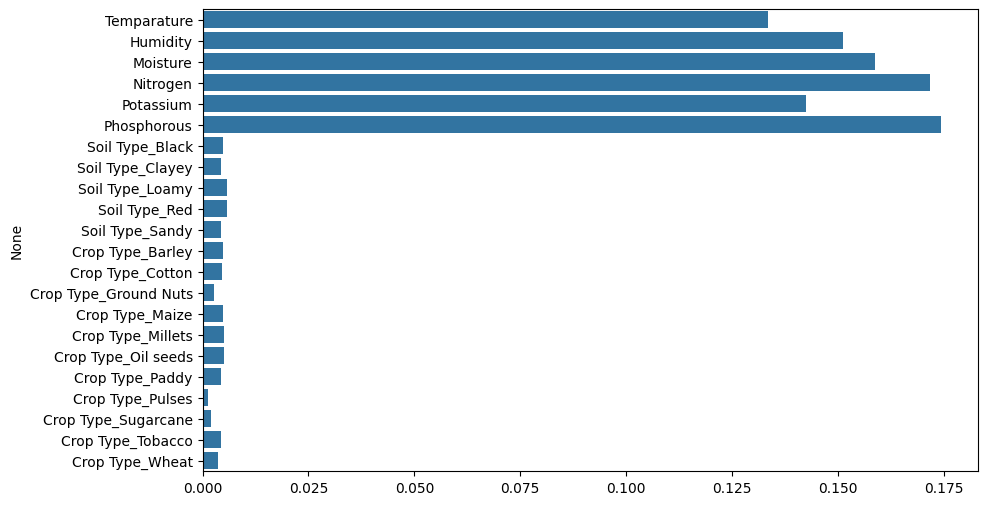

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
importance=rf.feature_importances_
feature_names=X_final.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importance,y=feature_names)
plt.title=('feature im-portance -random forrest')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.utils import to_categorical

# Encode labels using the original 'y' which has consistent samples with X_final
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Train-test split using X_final and the correctly sized y_categorical
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_final, y_categorical, test_size=0.2, random_state=42)

# Define model
model = Sequential([
    Dense(64, input_shape=(X_final.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(y_categorical.shape[1], activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=10, batch_size=32)

Epoch 1/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - accuracy: 0.1507 - loss: 1.9693 - val_accuracy: 0.1546 - val_loss: 1.9420
Epoch 2/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.1541 - loss: 1.9423 - val_accuracy: 0.1534 - val_loss: 1.9416
Epoch 3/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.1543 - loss: 1.9415 - val_accuracy: 0.1534 - val_loss: 1.9410
Epoch 4/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.1549 - loss: 1.9413 - val_accuracy: 0.1546 - val_loss: 1.9409
Epoch 5/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.1539 - loss: 1.9409 - val_accuracy: 0.1543 - val_loss: 1.9405
Epoch 6/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.1544 - loss: 1.9411 - val_accuracy: 0.1552 - val_loss: 1.9403
Epoch 7/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.1546 - loss: 1.9409 - val_accuracy: 0.1556 - val_loss: 1.9401
Epoch 8/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 

In [24]:
# Load test data
test = pd.read_csv('/content/test.csv')  # adjust path if needed

# Save test IDs for submission
test_ids = test['id']

# Drop ID column as it was not used in training
test.drop('id', axis=1, inplace=True)

# One-hot encode categorical features (just like in train)
test_encoded = pd.get_dummies(test, columns=['Crop Type', 'Soil Type'])

# Align test columns with training columns
test_data_final = test_encoded.reindex(columns=X_final.columns, fill_value=0)

# Predict using trained Random Forest model
y_test_preds_encoded = rf.predict(test_data_final)

# Decode encoded predictions back to original fertilizer names
y_test_preds_decoded = le.inverse_transform(y_test_preds_encoded)

# Load sample submission
sample_submission = pd.read_csv('/content/sample_submission.csv')

# Fill the Fertilizer Name column with predictions
sample_submission['Fertilizer Name'] = y_test_preds_decoded

# Save submission file
sample_submission.to_csv('fertilizer_submission.csv', index=False)

print("✅ Submission file 'fertilizer_submission.csv' is ready!")

✅ Submission file 'fertilizer_submission.csv' is ready!


In [25]:
# Label encoder inspection
print("🔹 Classes in Label Encoder:", list(le.classes_))
print("🔹 Encoded predictions (sample):", y_test_preds_encoded[:5])
print("🔹 Decoded predictions (sample):", le.inverse_transform(y_test_preds_encoded[:5]))

# Column alignment check
train_cols = list(X_final.columns)
test_cols = list(test_data_final.columns)
print("\n✅ Columns aligned?", train_cols == test_cols)
print("🔸 Missing in test:", set(train_cols) - set(test_cols))
print("🔸 Extra in test:", set(test_cols) - set(train_cols))

# Final predictions distribution
print("\n📊 Prediction distribution:")
print(pd.Series(y_test_preds_decoded).value_counts())

🔹 Classes in Label Encoder: ['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP', 'Urea']
🔹 Encoded predictions (sample): [4 0 2 6 0]
🔹 Decoded predictions (sample): ['28-28' '10-26-26' '17-17-17' 'Urea' '10-26-26']

✅ Columns aligned? True
🔸 Missing in test: set()
🔸 Extra in test: set()

📊 Prediction distribution:
10-26-26    54200
14-35-14    47881
17-17-17    40683
20-20       35190
28-28       31880
DAP         21438
Urea        18728
Name: count, dtype: int64


In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=15, random_state=42)

scores = cross_val_score(rf, X_final,y_encoded, cv=skf, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validated accuracy scores: [0.15916    0.15852667 0.15955333 0.15927333 0.15827333]
Mean CV Accuracy: 0.1589573333333333
